In [2]:
using Turing, Flux, Plots, Random, ReverseDiff
Turing.setprogress!(false);
Turing.setadbackend(:reversediff)

┌ Info: [Turing]: progress logging is disabled globally
└ @ Turing C:\Users\XudongT\.julia\packages\Turing\S4Y4B\src\Turing.jl:22
┌ Info: [AdvancedVI]: global PROGRESS is set as false
└ @ AdvancedVI C:\Users\XudongT\.julia\packages\AdvancedVI\W2zsz\src\AdvancedVI.jl:15


:reversediff

In [7]:
N = 80
M = round(Int, N / 4)
Random.seed!(1234)
x1s = rand(M) * 4.5
x2s = rand(M) * 4.5
xt1s = Array([[x1s[i] + 0.5; x2s[i] + 0.5] for i in 1:M])
x1s = rand(M) * 4.5;
x2s = rand(M) * 4.5;
append!(xt1s, Array([[x1s[i] - 5; x2s[i] - 5] for i in 1:M]))

x1s = rand(M) * 4.5;
x2s = rand(M) * 4.5;
xt0s = Array([[x1s[i] + 0.5; x2s[i] - 5] for i in 1:M])
x1s = rand(M) * 4.5;
x2s = rand(M) * 4.5;
append!(xt0s, Array([[x1s[i] - 5; x2s[i] + 0.5] for i in 1:M]));

In [9]:
xs = [xt1s; xt0s]
ts = [ones(2 * M); zeros(2 * M)];

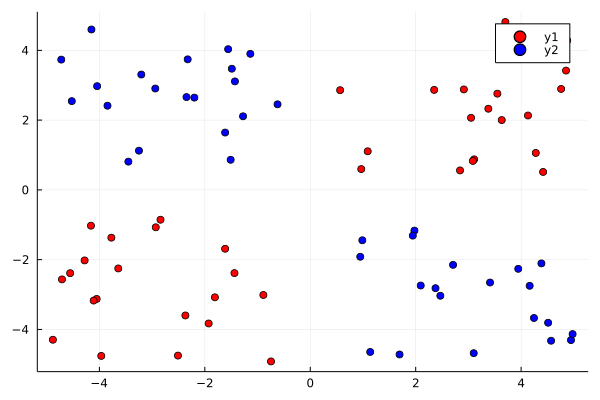

In [10]:
function plot_data()
    x1 = map(e -> e[1], xt1s)
    y1 = map(e -> e[2], xt1s)
    x2 = map(e -> e[1], xt0s)
    y2 = map(e -> e[2], xt0s)

    Plots.scatter(x1, y1; color="red", clim=(0, 1))
    return Plots.scatter!(x2, y2; color="blue", clim=(0, 1))
end

plot_data()

In [11]:
nn_initial = Chain(Dense(2, 3, tanh), Dense(3, 2, tanh), Dense(2, 1, σ))

Chain(
  Dense(2 => 3, tanh),                  # 9 parameters
  Dense(3 => 2, tanh),                  # 8 parameters
  Dense(2 => 1, σ),                     # 3 parameters
)                   # Total: 6 arrays, 20 parameters, 464 bytes.

In [16]:
parameters_initial, reconstruct = Flux.destructure(nn_initial);
length(parameters_initial)

20